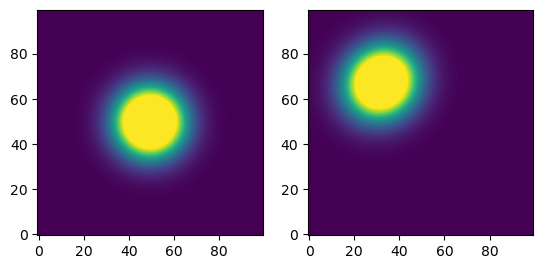

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wam2layers.tracking.backtrack import advection

# Grid
nx = ny = 100
x, y = np.indices([nx, ny])

# Initial field
q0 = np.exp(
    -(x+.5-nx/2)**2 / (2*(nx/10)**2)
    -(y+.5-ny/2)**2 / (2*(ny/10)**2)
)

u = np.ones((nx-2, ny-1)) * .5
v = np.ones((nx-1, ny-2)) * .5

q = q0.copy()
for i in range(35):
    # Reverse velocity direction to get backtracking
    q[1:-1, 1:-1] += advection(q, -u, -v)

fig, [ax0, ax1] = plt.subplots(1, 2)
ax0.imshow(q0, origin='lower', vmin=0, vmax=.5)
ax1.imshow(q, origin='lower', vmin=0, vmax=.5)
